In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [7]:
# create a dataset
np.random.seed(42)
data = {
    'product_id': np.arange(1, 21),
    'product_name': [f'Product {i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronic', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold': np.random.poisson(lam=20, size=20),
    'sales_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
}
# display the dataset
sales_data = pd.DataFrame(data)
print('Sales Data:')
print(sales_data)

Sales Data:
    product_id product_name    category  units_sold sales_date
0            1    Product 1        Home          25 2023-01-01
1            2    Product 2      Sports          15 2023-01-02
2            3    Product 3  Electronic          17 2023-01-03
3            4    Product 4        Home          19 2023-01-04
4            5    Product 5        Home          21 2023-01-05
5            6    Product 6      Sports          17 2023-01-06
6            7    Product 7  Electronic          19 2023-01-07
7            8    Product 8  Electronic          16 2023-01-08
8            9    Product 9        Home          21 2023-01-09
9           10   Product 10    Clothing          21 2023-01-10
10          11   Product 11        Home          17 2023-01-11
11          12   Product 12        Home          22 2023-01-12
12          13   Product 13        Home          14 2023-01-13
13          14   Product 14        Home          17 2023-01-14
14          15   Product 15      Sports    

In [9]:
# save the dataset to a CSV file at a specified location
sales_data.to_csv(r'C:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Statistics_workshop\dataset\sales_data.csv', index=False)

In [12]:
# Descriptive stats

descriptive_stats = sales_data['units_sold'].describe()
print('\nDescriptive Stats for Units Sold:')
print(descriptive_stats)

mean_units_sold = sales_data['units_sold'].mean()
median_units_sold = sales_data['units_sold'].median()
mode_units_sold = sales_data['units_sold'].mode()[0]
variance_units_sold = sales_data['units_sold'].var()
std_dev_units_sold = sales_data['units_sold'].std()

category_stats = sales_data.groupby('category')['units_sold'].agg(['mean', 'median', 'std', 'sum']).reset_index()

#display the descriptive statistics
print('\nStatistical Analysis:')
print(f'Mean Units Sold: {mean_units_sold}')
print(f'Median Units Sold: {median_units_sold}')
print(f'Mode Units Sold: {mode_units_sold}')
print(f'Variance Units Sold: {variance_units_sold}')
print(f'Standard Deviation Units Sold: {std_dev_units_sold}')
print('\nCategory-wise Descriptive Stats:')
print(category_stats)


Descriptive Stats for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance Units Sold: 10.90526315789474
Standard Deviation Units Sold: 3.3023117899275864

Category-wise Descriptive Stats:
     category       mean  median       std  sum
0    Clothing  21.000000    21.0       NaN   21
1  Electronic  18.250000    18.0  2.217356   73
2        Home  20.111111    21.0  3.723051  181
3      Sports  16.833333    17.0  2.714160  101


In [13]:
# infrential stats
confidence_level = 0.95
degree_of_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_units_sold
sample_standard_error = std_dev_units_sold / np.sqrt(len(sales_data['units_sold']))

# t-score
t_score = stats.t.ppf((1 + confidence_level) / 2, degree_of_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print('\nConfidence Interval for Units Sold:')
print(f'Confidence Interval: {confidence_interval}')



Confidence Interval for Units Sold:
Confidence Interval: (17.254470507823573, 20.34552949217643)


In [16]:
# hypothesis testing
null_hypothesis = 'The mean units sold is equal to 20'
alternative_hypothesis = 'The mean units sold is not equal to 20'
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)
print('\nHypothesis Testing:')
# print(f'Null Hypothesis: {null_hypothesis}')
# print(f'Alternative Hypothesis: {alternative_hypothesis}')
print(f'T-statistic: {t_statistic}, P-value: {p_value}')


if p_value < 0.05:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')
    


Hypothesis Testing:
T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis.


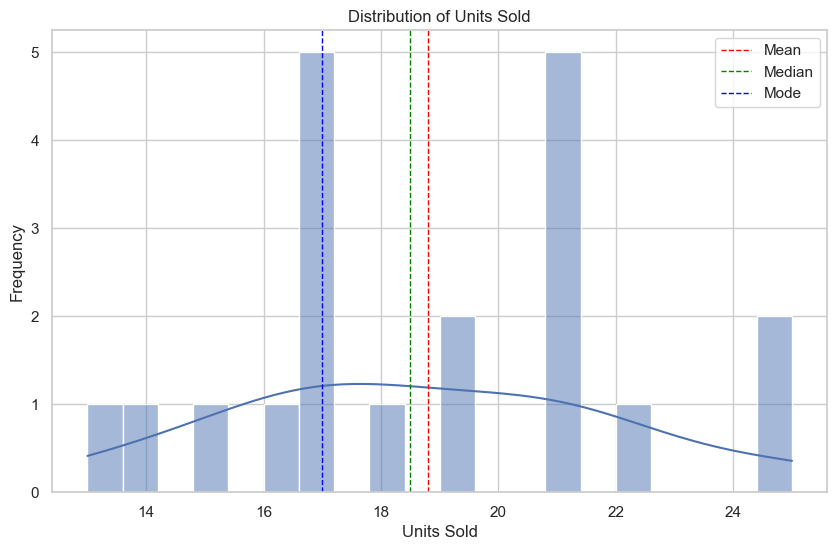

In [17]:
# Visualization
sns.set(style='whitegrid')


# plot the distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], kde=True, bins=20)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_units_sold, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_units_sold, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode_units_sold, color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.legend()
plt.show()


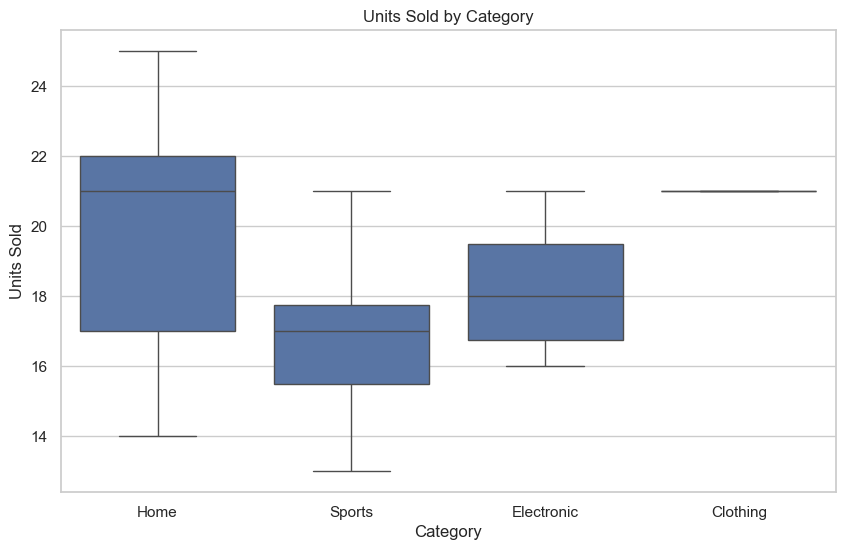

In [18]:
# boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()


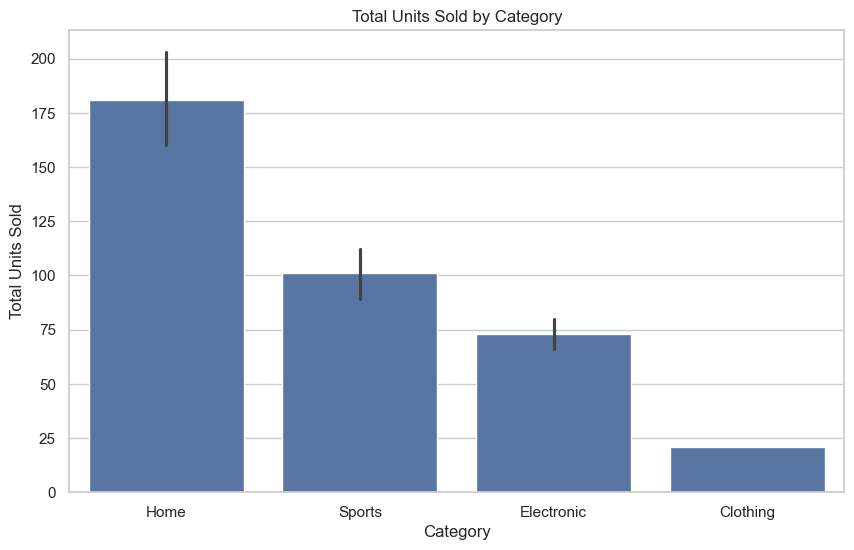

In [28]:
# bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='units_sold', data= sales_data, estimator=sum)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()

